
# Disease prediction
<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; background-color: #001024; border-radius: 8px; border-style: solid; border-color: #020220; padding: 20px; margin: 20px">



<p style="color:#e2d8f2">
In this section, we will work with a dataset containing data on cardiovascular disease. Begin by downloading the <a href="https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset">dataset from Kaggle</a> and read about what the different features mean. Note that this dataset contains many inaccuracies, such as negative blood pressure and blood pressure that is impossibly high.</p>

---

<h3 style="color:#dfd0f5"> Data description</h3>
<p style="color:#e2d8f2">
There are 3 types of input features:<br><br

• Objective: factual information;<br>
• Examination: results of medical examination;<br>
• Subjective: information given by the patient.<br>

###### Yeah I'll have to settle on another color palette... Gotta save these hexes tho.

<code>
 BG COLOR:  #001024
 BORDER:    #020220
 p: 		   #e2d8f2
 headers:   #dfd0f5
</code>

</p>
    </div>
    <div style="flex: 1; background-color: #f9f9f9; border-radius: 8px; padding: 2px; margin: 20px">
<img src='https://upload.wikimedia.org/wikipedia/commons/6/67/Heart_diagram_blood_flow_en.svg'>
    </div>
</div>

#### Features:

| Feature | Type | Variable | Data Type |
| --- | --- | --- | --- |
| Age | Objective | age | int (days) |
| Height | Objective | height | int (cm) |
| Weight | Objective | weight | float (kg) |
| Gender | Objective | gender | categorical code |
| Systolic blood pressure | Examination | ap_hi | int |
| Diastolic blood pressure | Examination | ap_lo | int |
| Cholesterol | Examination | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective | smoke | binary |
| Alcohol intake | Subjective | alco | binary |
| Physical activity | Subjective | active | binary |
| Presence or absence of cardiovascular disease | Target | cardio | binary |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Data/cardio_train.csv',
                sep = ';', index_col = False).iloc[:, 1:] # exclude id column

In [3]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


## 1.0 - Finding inaccuracies

As stated in the task description, there should be many inaccuracies in the dataset, so let's look for those.
I've made a list of all the features and what to check, etc.

0 Age
- Check for negative or extreme values
- Convert age from days to years ```(lambda x: round(x/365.25))```

1 Gender
- Check values
- Replace 0 with man and 1 with woman
 
2 Height
3 Weight
- Check for incorrectly inputed self-reported data
- Create BMI column 
- Remove BMI < 14 & > 50 ```(mask = (df['bmi'] >= 14) & (df['bmi'] <= 50))```

4 ap_hi (Systolic BP)<br>
5 ap_lo (Diastolic BP)
- Check for unrealistic BP values
- Remove unrealistic values (some were *really* extreme)

 6   cholesterol  
 7   gluc         
 8   smoke        
 9   alco         
 10  active
- All of these are binary, shouldn't be much of an issue.

 11  cardio
 - Target variable, no accuracies found.

### Finding inaccuracies 0: Age

In [5]:
# Convert days to year for age column
df['age'] = df['age'].apply(lambda x: round(x/365.25))

In [6]:
df['age'].min(), df['age'].max(), df['age'].mean()

(30, 65, 53.303157142857145)

In [7]:
len(df['age'].unique())

28

Text(0.5, 1.0, 'Age distribution')

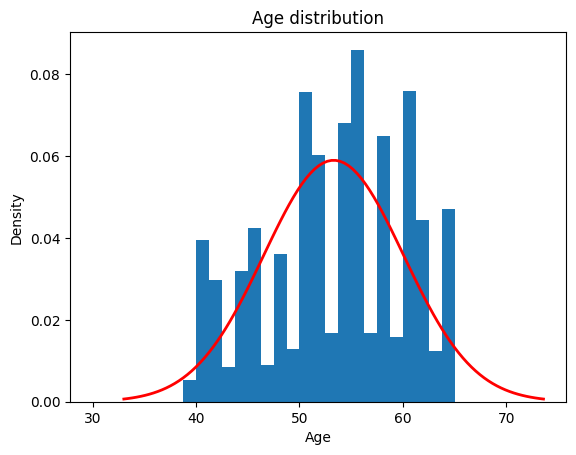

In [8]:
import numpy as np
plt.hist(df['age'], bins=len(df['age'].unique()), density=True)

# Overlay a normal distribution curve
mu, std = df['age'].mean(), df['age'].std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
plt.plot(x, 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2)), linewidth=2, color='r')

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age distribution')

No inaccuracies found. Interesting spread though.

---

### Finding inaccuracies 1: Gender

In [9]:
df['gender'].unique(), df['gender'].value_counts()

(array([2, 1]),
 1    45530
 2    24470
 Name: gender, dtype: int64)

In [10]:
df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)

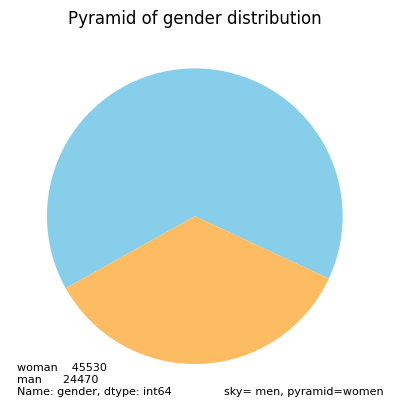

In [11]:
plt.pie(df['gender'].value_counts(), startangle=-25, colors=['#87ceeb','#fdbc62', ])
plt.title('Pyramid of gender distribution')
plt.text(s="sky= men, pyramid=women",x=0.2,y=-1.2,fontsize=8)
plt.text(s=f"{df['gender'].value_counts()}",x=-1.2,y=-1.2,fontsize=8)
plt.show()

No inaccuracies found.

---

### Finding inaccuracies 2 & 3: Height & Weight

In [12]:
df['height'].mean(), df['weight'].mean(), df['weight'].min(), df['height'].min(), df['weight'].max(), df['height'].max()

(164.35922857142856, 74.20569, 10.0, 55, 200.0, 250)

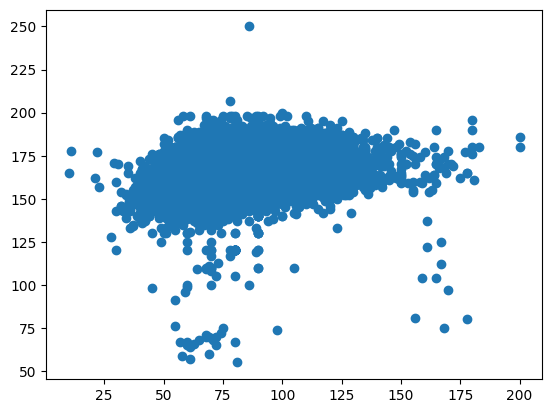

In [13]:
plt.scatter(y=df['height'],x=df['weight'])

In [14]:
def get_bmi(weight,height):
    return weight / (height*0.01)**2

get_bmi(62.2,188)

17.598460842009956

In [15]:
df['bmi'] = df.apply(lambda x: get_bmi(x['weight'], x['height']), axis=1)

In [16]:
df['bmi'].sort_values()

33817      3.471784
57858      3.673095
29488      7.022248
60188      8.001829
26806      9.331007
            ...    
29157    191.666667
23913    237.768633
22723    267.768595
27384    278.125000
12770    298.666667
Name: bmi, Length: 70000, dtype: float64

I consulted a doctor, she told me <em>One cannot have a BMI below 10 or above 50.</em> I said ok doc.

"man kan leva när man e över 30 (BMI) men d svår att leva om man e mer på d låga" - doktor Frehner

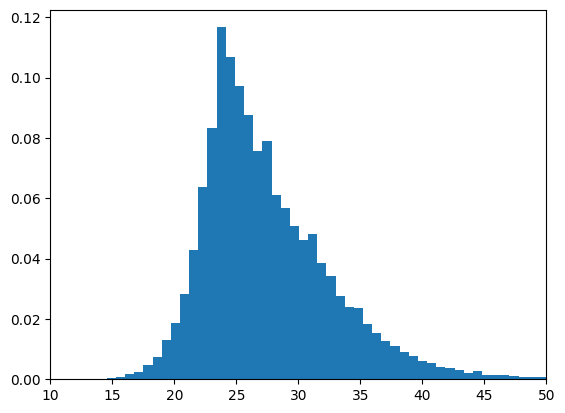

In [17]:
plt.hist(df['bmi'], bins=400, density=True)
plt.xlim(10,50)
plt.show()

In [18]:
# Drop all rows with BMI < 10 and > 50
mask = (df['bmi'] >= 14) & (df['bmi'] <= 50)
df = df.drop(df[~mask].index)

In [19]:
print(f'{len(mask) - len(df)} rows removed due to unrealistic BMI.')

257 rows removed due to unrealistic BMI.


---

### Finding inaccuracies 4 & 5: Systolic & Diastolic BP (ap_hi, ap_lo)

In [20]:
print(df['ap_hi'].min(), df['ap_lo'].min())
print(df['ap_hi'].max(), df['ap_lo'].max())

-150 -70
16020 11000


In [21]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


Once again I consulted ze doctor. She told me she was busy and to do my own work. So I tried the good ol' google.

Optimal blood pressure is less than 120/80[mm Hg]* (systolic/diastolic).$^{[1]}$

When an individual is approaching death, the systolic blood pressure will typically drop below 95mm Hg.$^{[2]}$

Hypertensive crisis: higher than 180 systolic and/or higher than 120 diastolic.$^{[3]}$

<p>*editor's note</p>

$[1]$ https://www.webmd.com/heart/understanding-low-blood-pressure-basics <br>
$[2]$ https://www.crossroadshospice.com/hospice-resources/end-of-life-signs/blood-pressure/ <br>
$[3]$ https://www.healthline.com/health/diastole-vs-systole#blood-pressure-ranges <br>



In [22]:
# Drop all rows with ap_hi (systolic) < 95 and > 190
mask1 = (df['ap_hi'] >= 95) & (df['ap_hi'] <= 190)
df = df.drop(df[~mask1].index)

In [23]:
# Drop all rows with ap_lo (diastolic) < 70 and > 130
mask2 = (df['ap_lo'] >= 50) & (df['ap_lo'] <= 130)
df = df.drop(df[~mask2].index)

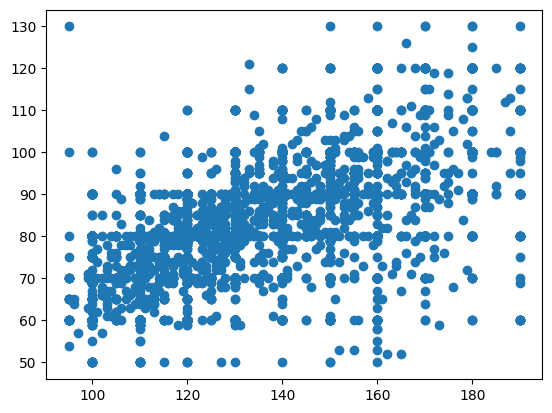

In [24]:
plt.scatter(x=df['ap_hi'],y=df['ap_lo'])

In [25]:
70000 - len(mask1) + 70000 - len(mask2) 

2029

2029 rows removed due to unrealistic BP.

Diastolic blood pressure cannot be higher than systolic blood pressure, but how big can the difference be?

---

### Finding inaccuracies 6-11: Cholesterol, Glucose, Smoking, Alcohol, Physical Activity, Cardiovascular Disease

In [26]:
columns = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

for col in columns:
    print(df[col].value_counts())

1    50417
2     9061
3     7753
Name: cholesterol, dtype: int64
1    57196
3     5124
2     4911
Name: gluc, dtype: int64
0    61306
1     5925
Name: smoke, dtype: int64
0    63638
1     3593
Name: alco, dtype: int64
1    54017
0    13214
Name: active, dtype: int64
0    33712
1    33519
Name: cardio, dtype: int64


No inaccuracies found.

---

In [27]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


## 2.0 - EDA Warmup

In [175]:
# a) How many people are positive for cardiovascular disease and how many are negative?

print(f"{df['cardio'].value_counts()[0]} negative, {(df['cardio'].value_counts(normalize=True)[0])*100:.4f}%")
print(f"{df['cardio'].value_counts()[1]} positive, {(df['cardio'].value_counts(normalize=True)[1])*100:.4f}%")

33712 negative, 50.1435%
33519 positive, 49.8565%


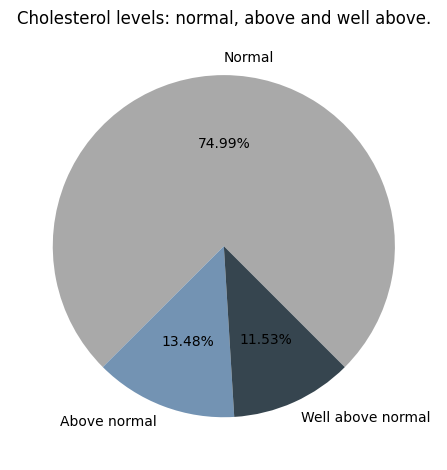

In [29]:
# b) What percentage of people have normal, above normal, and well above normal cholesterol levels? Create a pie chart.

labels = ['Normal', 'Above normal', 'Well above normal']
chol_vals = df['cholesterol'].value_counts()
pieces = [chol_vals.loc[1],chol_vals.loc[2],chol_vals.loc[3]]

colors = ['#A9A9A9','#7393B3','#36454F']
 
fig1, ax1 = plt.subplots()
ax1.pie(pieces, colors = colors, labels=labels, autopct='%1.2f%%', startangle=-45)
plt.title('Cholesterol levels: normal, above and well above.')
fig = plt.gcf()
plt.tight_layout()
plt.show()

(array([4.0000e+00, 0.0000e+00, 2.9680e+03, 3.9140e+03, 6.9640e+03,
        9.1400e+03, 1.3519e+04, 8.6720e+03, 1.3244e+04, 8.8060e+03]),
 array([30. , 33.5, 37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. ]),
 <BarContainer object of 10 artists>)

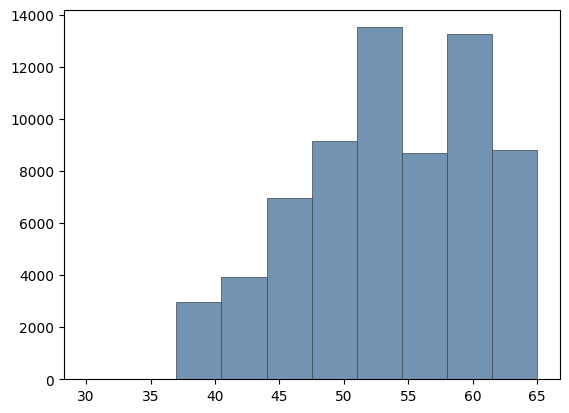

In [30]:
# c) What is the age distribution? Create a histogram.
plt.hist(df['age'], ec='#36454F', color='#7393B3', lw=0.5)

In [31]:
#d) What percentage of people smoke?
df['smoke'].value_counts(normalize=True)*100

0    91.187101
1     8.812899
Name: smoke, dtype: float64

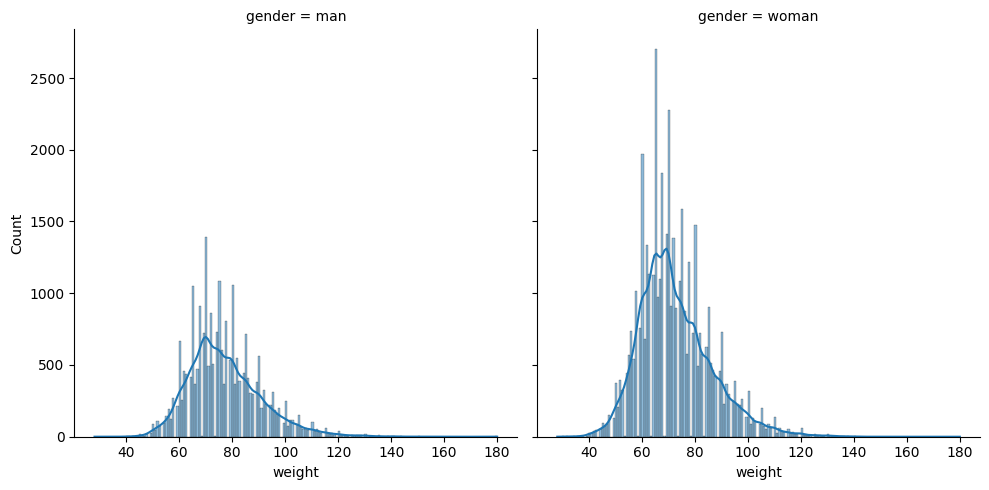

In [32]:
# e) What is the weight distribution? Create a suitable diagram.
sns.displot(df, x="weight", col="gender", kde=True)

In [33]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


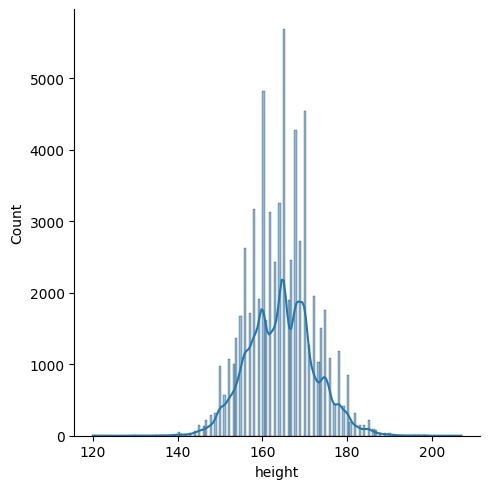

In [34]:
# f) What is the height distribution? Create a suitable diagram.
sns.displot(df,x="height", kde=True)

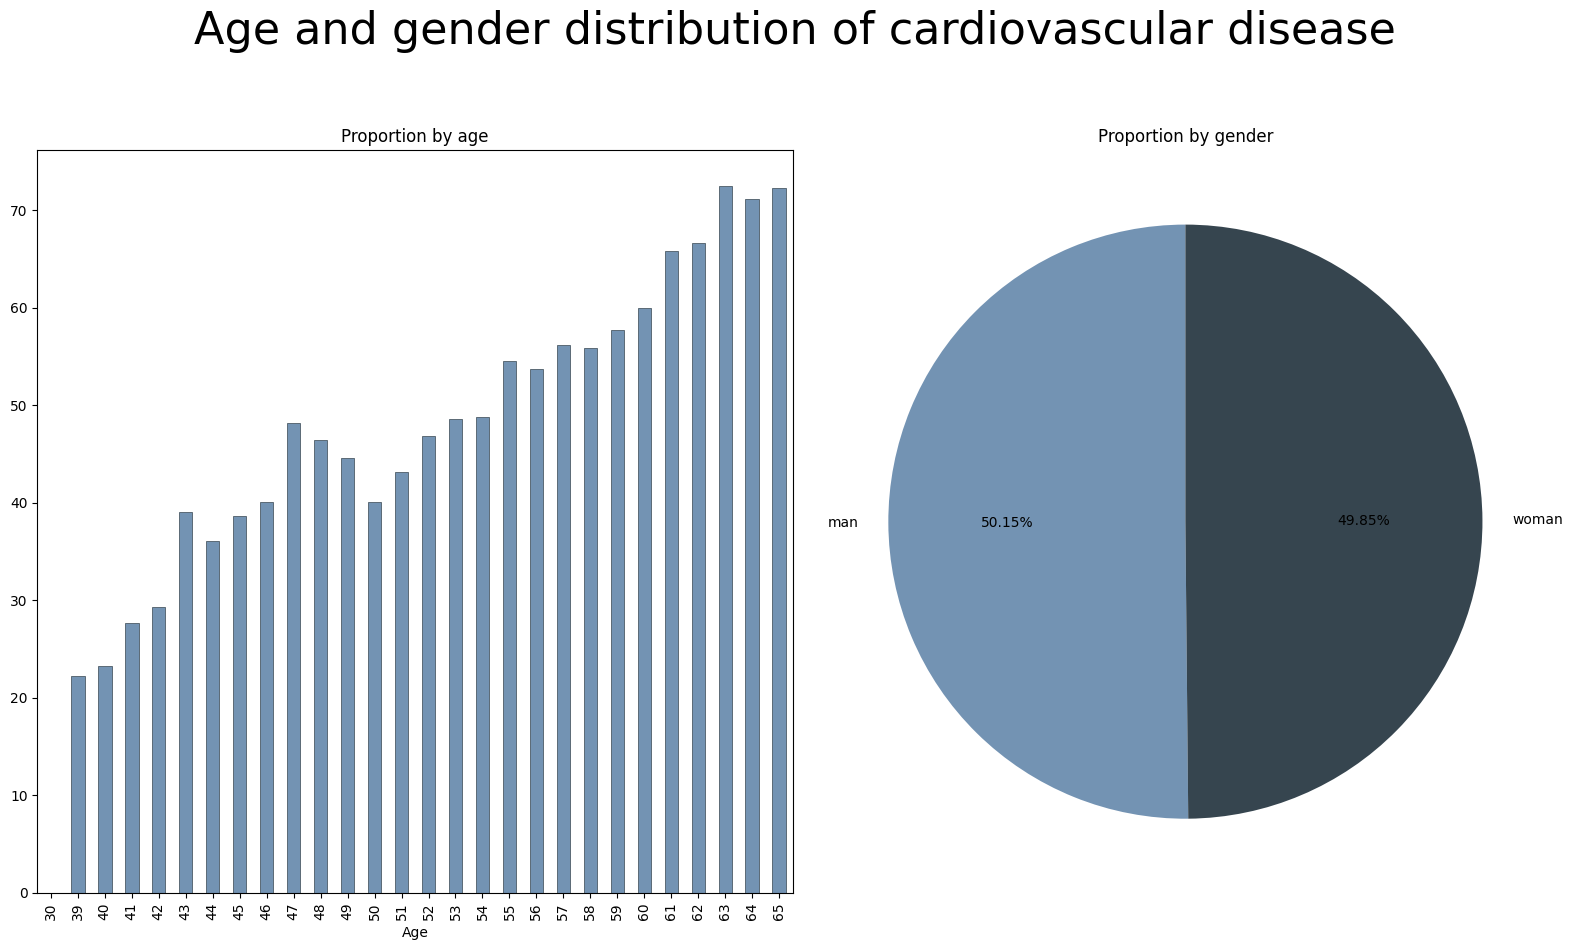

In [35]:
# g) What percentage of women and men have cardiovascular disease? Create a suitable diagram.

grouped_age = df.groupby('age')['cardio'].mean() * 100
grouped_gender = df.groupby('gender')['cardio'].mean() * 100

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 9))

grouped_age.plot(kind='bar', ax=ax1, ec='#36454F', color='#7393B3', lw=0.5)
ax1.set_xlabel('Age')
ax1.set_title('Proportion by age')

grouped_gender.plot(kind='pie', ax=ax2, colors=['#7393B3', '#36454F'], startangle=90, autopct='%1.2f%%')
ax2.set_title('Proportion by gender')
ax2.axes.yaxis.set_visible(False)

fig.suptitle('Age and gender distribution of cardiovascular disease', fontsize=32, y=1.05)
plt.tight_layout()
plt.show()


## 2.1.0 - Feature engineering BMI 

Create a feature for BMI (Body Mass Index), read about <a href="https://en.wikipedia.org/wiki/Body_mass_index">the formula on wikipedia</a>.

a) Throw away the samples with unreasonable BMIs and outliers. Note that this can be difficult to determine in which range of BMIs we should save. Describe how you arrive at the limits.

b) Create a categorical BMI feature with the categories: normal range, overweight, obese (class I), obese (class II), obese (class III).

In [36]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,man,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,woman,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,woman,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,man,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,woman,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [37]:
# Categorical BMI
df_bmi = pd.read_html('https://en.wikipedia.org/wiki/Body_mass_index')[2] # Read table from Wikipedia

In [38]:
import re

# Drop column BMI Prime
df_bmi.drop(df_bmi.columns[2], axis=1, inplace=True)

# Find and extract floats
extract_floats = lambda x: re.findall('([+-]?[0-9]*\.[0-9]*)', x)
df_bmi['floats'] = df_bmi['BMI (kg/m2)[c]'].apply(extract_floats)

# Drop old BMI col
df_bmi.drop(df_bmi.columns[1], axis=1, inplace=True)
df_bmi[['Lower_Bound', 'Upper_Bound']] = df_bmi['floats'].apply(lambda x: pd.Series([x[0], x[-1]]))

# Replace lower and upper with inf values
df_bmi.loc[df_bmi.index[0], 'Lower_Bound'] = -np.inf
df_bmi.loc[df_bmi.index[-1], 'Upper_Bound'] = np.inf

# Make sure they're floats
df_bmi['Lower_Bound'] = df_bmi['Lower_Bound'].astype(float)
df_bmi['Upper_Bound'] = df_bmi['Upper_Bound'].astype(float)

# Drop old float column
df_bmi.drop(df_bmi.columns[1], axis=1, inplace=True)

In [39]:
df_bmi # Ok, doing this manually would've been like 40 times faster...

,Category,Lower_Bound,Upper_Bound
0,Underweight (Severe thinness),-inf,16.0
1,Underweight (Moderate thinness),16.0,16.9
2,Underweight (Mild thinness),17.0,18.4
3,Normal range,18.5,24.9
4,Overweight (Pre-obese),25.0,29.9
5,Obese (Class I),30.0,34.9
6,Obese (Class II),35.0,39.9
7,Obese (Class III),40.0,inf


In [40]:
def get_bmi_category(bmi):
    for i in range(len(df_bmi)):
        if bmi >= df_bmi.loc[i, 'Lower_Bound'] and bmi <= df_bmi.loc[i, 'Upper_Bound']:
            return df_bmi.loc[i, 'Category']
    return np.nan

# Round BMI values to 1 decimal and apply mapping for categories
df['bmi_category'] = df['bmi'].round(1).apply(get_bmi_category)

In [41]:
df['bmi_category'].value_counts()

Overweight (Pre-obese)             24717
Normal range                       24300
Obese (Class I)                    11893
Obese (Class II)                    4197
Obese (Class III)                   1577
Underweight (Mild thinness)          414
Underweight (Moderate thinness)       88
Underweight (Severe thinness)         45
Name: bmi_category, dtype: int64

In [42]:
# Remove ' thinness' from underweight categories
df['bmi_category'] = df['bmi_category'].str.replace(r'\b thinness\b', '', regex=True)

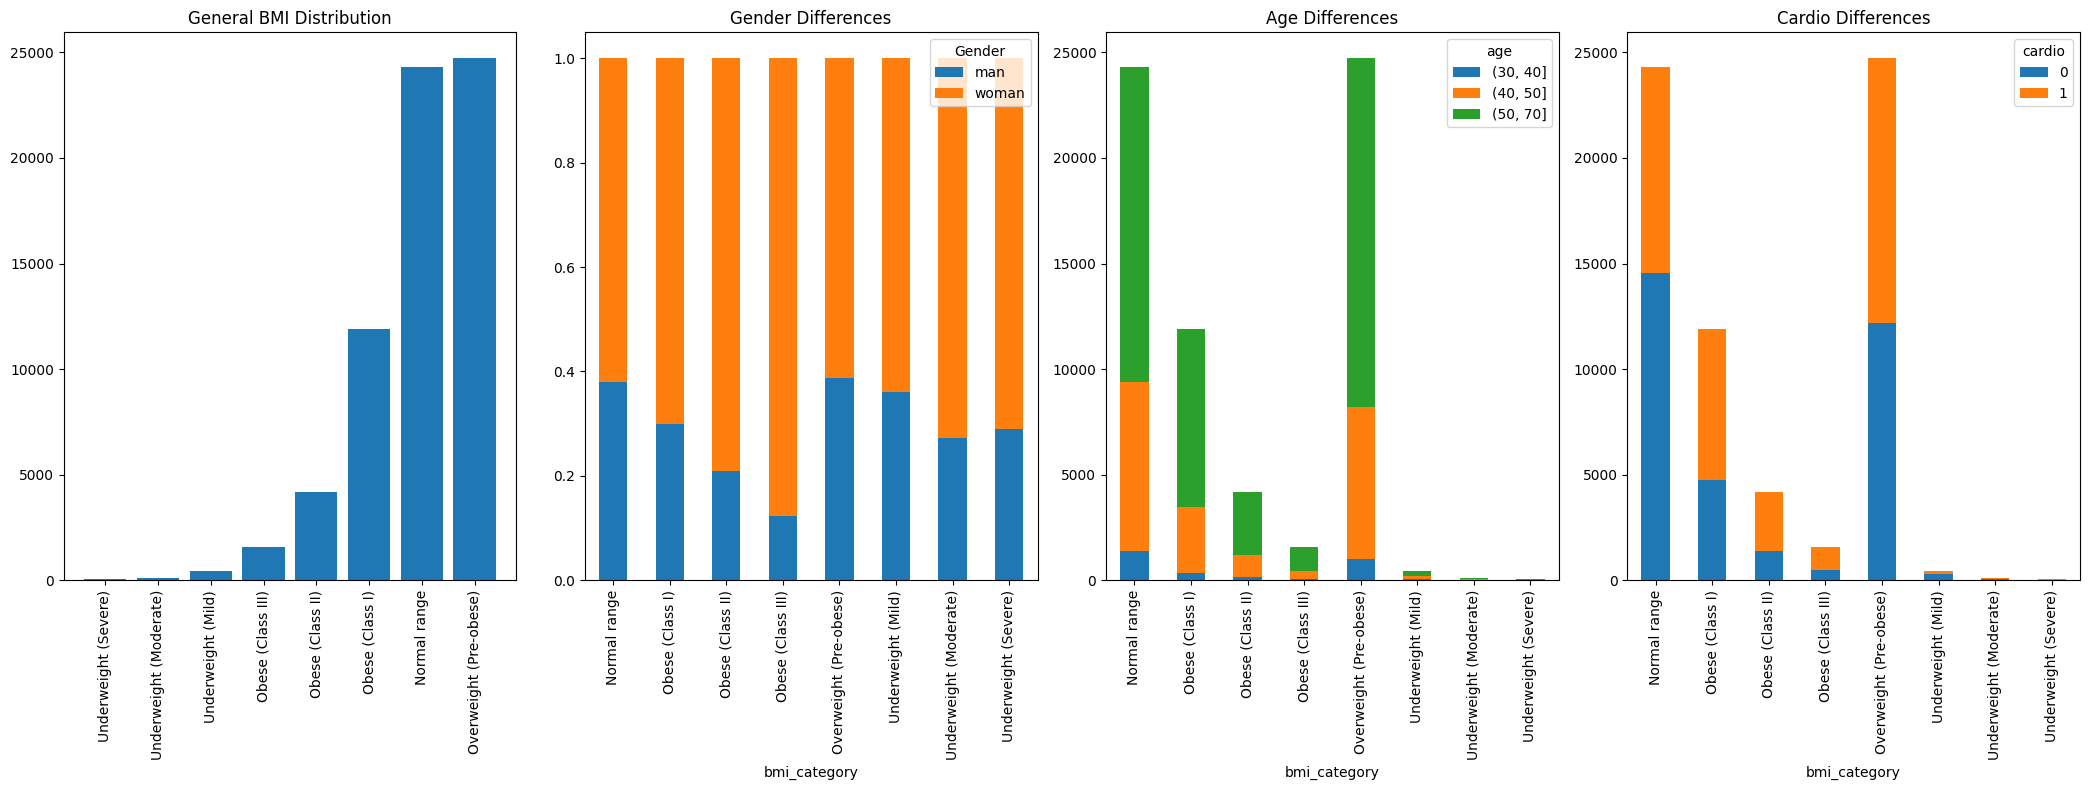

In [43]:
# Count occurrences of each BMI category
category_counts = df['bmi_category'].value_counts(ascending=True)

# Count occurrences of each gender in each BMI category
gender_counts = df.groupby(['bmi_category', 'gender'])['gender'].count().unstack()

# Count occurrences of each age group (30-40-50-70) in each BMI category
age_counts = df.groupby(['bmi_category', pd.cut(df['age'], [30, 40, 50, 70])])['age'].count().unstack()

# Count occurrences of each cardio status in each BMI category
cardio_counts = df.groupby(['bmi_category', 'cardio'])['cardio'].count().unstack()

# Create a 2x2 grid of plots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(21, 8))

# General BMI categories
axs[0].bar(category_counts.index, category_counts.values)
axs[0].set_title('General BMI Distribution')
axs[0].tick_params(axis='x', rotation=90)

# Gender category is imbalanced because there are twice as many women as there are men.
# It can and *will* result in a misleading representation of unless we normalize the data by using percentages.

gender_counts = df.groupby(['bmi_category', 'gender'])['gender'].count().unstack()
gender_perc = gender_counts.div(gender_counts.sum(axis=1), axis=0)

gender_perc.plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Gender Differences')
axs[1].legend(title='Gender')
axs[1].tick_params(axis='x')

# Stacked bar chart of age differences
age_counts.plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Age Differences')
axs[2].tick_params(axis='x')

# Stacked bar chart of cardio differences
cardio_counts.plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Cardio Differences')
axs[3].tick_params(axis='x')
plt.tight_layout()

plt.show()


I mean, gender plot does not seem right even though I tried plotting percentage... I'll have to check on that later. TODO

Also TODO: Write formal analysis

### 2.1.1 - Feature engineering bloodpressure    

<div style="display: flex; flex-direction: row;">
    <div style="flex: 3; background-color: #ebf3f5; padding: 40px; margin: 0px">
<p style="color:#000000">Discard samples with unreasonable blood pressure and outliers, similar to task 2.1.0, it is not trivial to set the boundaries. Create a feature for blood pressure categories according to the table in <a href="https://www.healthline.com/health/high-blood-pressure-hypertension#definition">this article</a>. Describe how you will determine the boundaries.
<br><br>
I already did the discarding. But I will create a feature of categories based on this table!
<br>

###### Hm, maybe this should be the bg color after all.

</p>
    </div>
    <div style="flex: 1.3;">
<img src="https://post.healthline.com/wp-content/uploads/2021/10/1535730-Everything-You-Need-to-Know-About-High-Blood-Pressure-Hypertension-1296x1109-Body.jpg" width="100%">
</div></div>

In [44]:
df_bp = pd.DataFrame()

bp_dict = {'Healthy': ['<120', 'and <80'], 
           'Elevated': ['120-129', 'and <80'], 
           'Stage 1 hypertension': ['130-139', 'or 80-89'], 
           'Stage 2 hypertension': ['140>', 'or >90'], 
           'Hypertensive crisis': ['>180', 'or >120']}

df_bp = pd.DataFrame.from_dict(bp_dict, orient='index', columns=['Systolic', 'Diastolic'])
df_bp = df_bp.reset_index().rename(columns={'index': 'Category'})

df_bp = df_bp[['Systolic', 'Diastolic', 'Category']]

df_bp

,Systolic,Diastolic,Category
0,<120,and <80,Healthy
1,120-129,and <80,Elevated
2,130-139,or 80-89,Stage 1 hypertension
3,140>,or >90,Stage 2 hypertension
4,>180,or >120,Hypertensive crisis


In [45]:
# We could just write if statements for ap_hi and ap_lo
# This might look stupid but sit tight cause here we go

def get_bp_category(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return "Healthy"
    elif 120 <= ap_hi <= 129 and ap_lo < 80:
        return "Elevated"
    elif (130 <= ap_hi <= 139) or (80 <= ap_lo <= 89):
        return "Stage 1 hypertension"
    elif (ap_hi >= 140) or (ap_lo >= 90):
        return "Stage 2 hypertension"
    elif (ap_hi > 180) or (ap_lo > 120):
        return "Hypertensive crisis"
    else:
        return "Invalid values"

In [46]:
# Insert new column with values from get_bp_function()
df.insert(6, 'bp_category', df.apply(lambda row: get_bp_category(row['ap_hi'], row['ap_lo']), axis=1))

In [47]:
df

,age,gender,height,weight,ap_hi,ap_lo,bp_category,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,50,man,168,62.0,110,80,Stage 1 hypertension,1,1,0,0,1,0,21.967120,Normal range
1,55,woman,156,85.0,140,90,Stage 2 hypertension,3,1,0,0,1,1,34.927679,Obese (Class I)
2,52,woman,165,64.0,130,70,Stage 1 hypertension,3,1,0,0,0,1,23.507805,Normal range
3,48,man,169,82.0,150,100,Stage 2 hypertension,1,1,0,0,1,1,28.710479,Overweight (Pre-obese)
4,48,woman,156,56.0,100,60,Healthy,1,1,0,0,0,0,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58,woman,165,80.0,150,80,Stage 1 hypertension,1,1,0,0,1,1,29.384757,Overweight (Pre-obese)
69995,53,man,168,76.0,120,80,Stage 1 hypertension,1,1,1,0,1,0,26.927438,Overweight (Pre-obese)
69997,52,man,183,105.0,180,90,Stage 2 hypertension,3,1,0,1,0,1,31.353579,Obese (Class I)
69998,61,woman,163,72.0,135,80,Stage 1 hypertension,1,2,0,0,0,1,27.099251,Overweight (Pre-obese)


lgtm!

## 2.2.0 - Visualize proportions

Create barplots with a feature against the proportion of positives for cardiovascular disease. For example, blood pressure categories against the proportion of positives, BMI category against the proportion of positives, etc. Make these plots in a figure with multiple subplots.

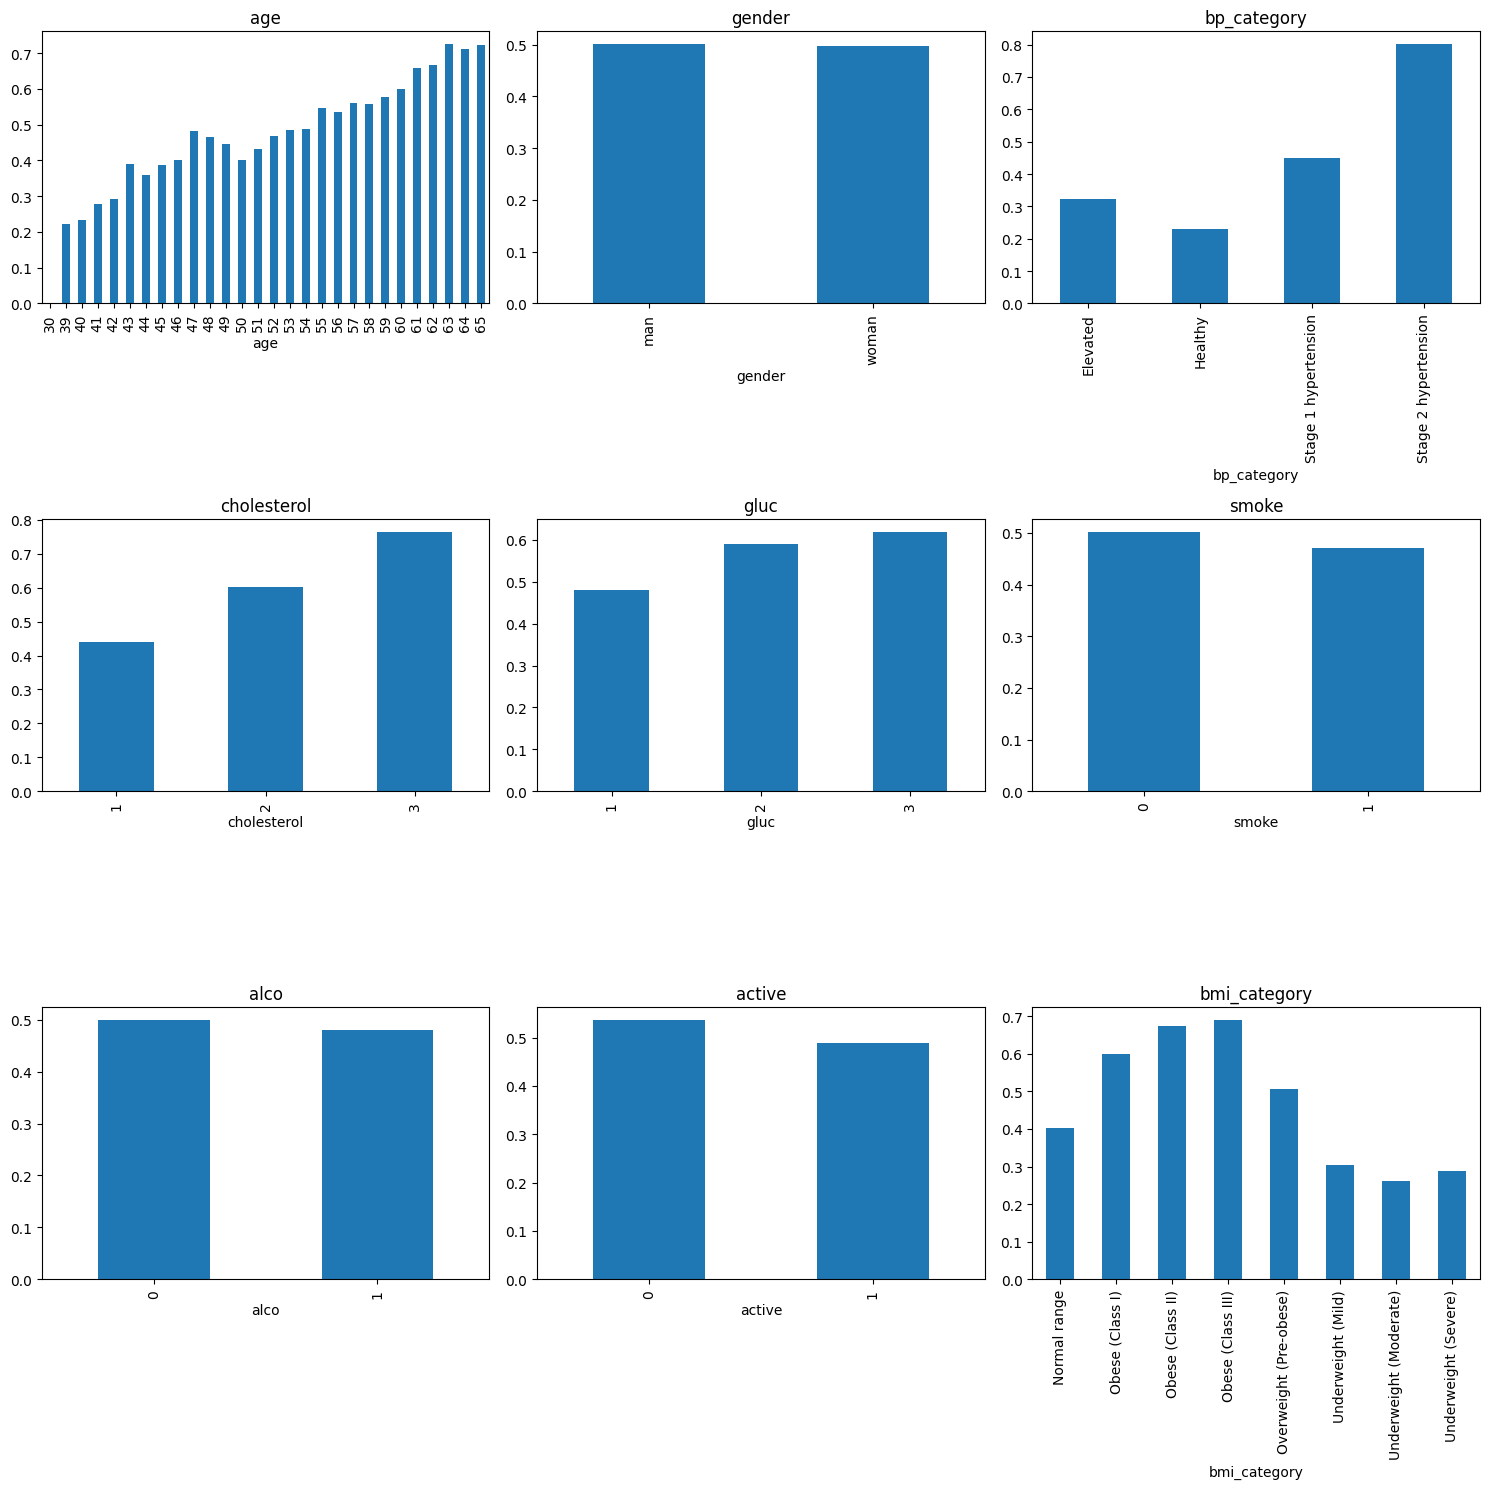

In [48]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, feature in enumerate(['age', 'gender', 'bp_category', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_category']):
    row, col = i // 3, i % 3 # row and column indices for feature of current loop

    # Mean to get proportions, this *will* be inbalanced TODO: look into how to adjust this better than mean()?? also TODO if time: style
    df.groupby(feature)['cardio'].mean().plot(kind='bar', ax=axs[row, col])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

### 2.2.1 - Visualization of correlations

Create a heatmap of correlations and see if you can find features that are strongly correlated, i.e., close to 1, or features that are strongly negatively correlated, i.e., close to -1. Can you explain why they may be correlated?

In [49]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,bp_category,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
0,50,man,168,62.0,110,80,Stage 1 hypertension,1,1,0,0,1,0,21.967120,Normal range
1,55,woman,156,85.0,140,90,Stage 2 hypertension,3,1,0,0,1,1,34.927679,Obese (Class I)
2,52,woman,165,64.0,130,70,Stage 1 hypertension,3,1,0,0,0,1,23.507805,Normal range
3,48,man,169,82.0,150,100,Stage 2 hypertension,1,1,0,0,1,1,28.710479,Overweight (Pre-obese)
4,48,woman,156,56.0,100,60,Healthy,1,1,0,0,0,0,23.011177,Normal range


<Axes: >

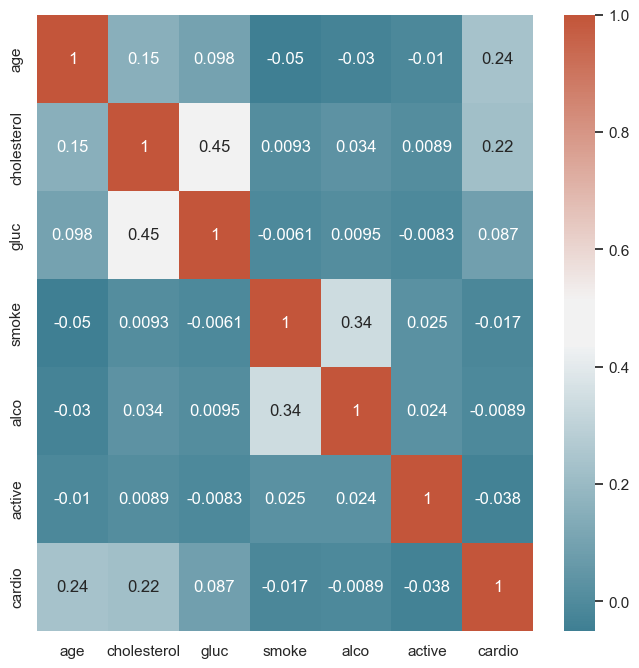

In [50]:
# Correlation matrix with categorical features
corr = df.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'bmi'], axis=1).corr(numeric_only=True)

# Color palette for the colorblind creatures
palette = sns.color_palette("colorblind")

# And a bigger figsize for nearsigthed teachers
sns.set(rc={'figure.figsize':(8,8)})

# Now display the heatmap like is is my leisure
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True), annot=True)

## 2.3 - Create two sets

Create a copy of your dataframe. On one:

- remove features: *ap_hi, ap_lo, height, weight, BMI*
- dummy encoding: *BMI-category, BP-category, och gender*

On the other:

- remove features: *BMI-category, BP-category, height, weight*
- dummy encoding: *gender*

In [107]:
df1 = pd.get_dummies(df.drop(['height', 'weight', 'ap_hi', 'ap_lo', 'bmi'], axis=1),
                            columns=['bmi_category', 'bp_category', 'gender'], drop_first=True)

df2 = pd.get_dummies(df.drop(['height', 'weight', 'bp_category', 'bmi_category'], axis=1),
                            columns=['gender'], drop_first=True)

## 2.4 - Choose model

Choose 3-5 machine learning models, preferably as different as possible. For each dataset we created in task 2.3, do the following:

- train|validation|test split
- scale the dataset with feature standardization and normalization (they are not done at the same time, but in different rounds)
- define hyperparameters (param_grids) to test for each model
- use ```GridSearchCV()``` and choose a suitable evaluation metric
- make predictions on validation data, calculate and save evaluation score for your chosen metric
- check the best parameters for each model

Which dataset do you choose and which model do you choose? Use the model you have chosen and train on all data except the test data.

In [136]:
df2.shape

(67231, 11)

In [109]:
df1 = df1.sample(frac=0.01)

In [110]:
df1.shape

(672, 18)

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Split the dataset into train, test and validation
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['cardio'], axis=1), df1['cardio'], test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [131]:
# Standardization scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Normalization scaling
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [132]:
# Hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [133]:
# GridSearchCV
clf = RandomForestClassifier(random_state=42)

grid_search_std = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

grid_search_norm = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Fit the model with standardization scaling
grid_search_std.fit(X_train_std, y_train)

grid_search_norm.fit(X_train_norm, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [138]:
# Make predictions using the best model
y_pred_std = grid_search_std.predict(X_val_std)


y_pred_norm = grid_search_norm.predict(X_val_norm)

# Accuracy evaluation score
acc_std = accuracy_score(y_val, y_pred_std)

acc_norm = accuracy_score(y_val, y_pred_norm)

print(f'Accuracy, df1, using standardization scaling: {acc_std}')
print(f'Accuracy, df1, using normalization scaling: {acc_norm}')



Accuracy, df1, using standardization scaling: 0.6534653465346535
Accuracy, df1, using normalization scaling: 0.6732673267326733


In [141]:
def random_forest(df, target='cardio', scaler='Standard', rng=42):
    """
    plz small dataframe, cpu is sauna

    Args:
    df (pandas.DataFrame): DataFrame
    target (str): Target variable name
    scaler (str): 'Standard', 'MinMax' or 'Both'
    rng (int): Random state for reproducibility

    Returns:
    values....

    """

    if target not in df.columns:
        raise ValueError(f"{target} is not a valid column in the DataFrame.")

    X_train, X_test, y_train, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size=0.25, random_state=rng)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=rng)

    # Hyperparameters to test for each model
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
    }

    # GridSearchCV
    clf = RandomForestClassifier(random_state=42)


    if scaler == 'Standard' or 'Both':

        # Standardization scaling
        scaler = StandardScaler()
        X_train_std = scaler.fit_transform(X_train)
        X_val_std = scaler.transform(X_val)
        X_test_std = scaler.transform(X_test)

        grid_search_std = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

        grid_search_std.fit(X_train_std, y_train)

        y_pred_std = grid_search_std.predict(X_val_std)

        acc_std = accuracy_score(y_val, y_pred_std)

    if scaler == 'MinMax' or 'Both':

        # Normalization scaling
        scaler = MinMaxScaler()
        X_train_norm = scaler.fit_transform(X_train)
        X_val_norm = scaler.transform(X_val)
        X_test_norm = scaler.transform(X_test)

        grid_search_norm = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

        grid_search_norm.fit(X_train_norm, y_train)

        y_pred_norm = grid_search_norm.predict(X_val_norm)

        acc_norm = accuracy_score(y_val, y_pred_norm)

    if scaler == 'Standard':
        return acc_std

    if scaler == 'MinMax':
        return acc_norm

    else: return acc_std, acc_norm

In [143]:
# Refactored again, now with error checks

def random_forest3(df, target='cardio', scaler='Standard', rng=42):
    """
    Splits the dataset into train, validation, and test sets, scales the data, and tunes the hyperparameters of a
    RandomForestClassifier using GridSearchCV.

    Args:
        df (pandas.DataFrame): DataFrame
        target (str): Target variable name
        scaler (str): 'Standard', 'MinMax' or 'Both'
        rng (int): Random state

    Returns:
        best_model (sklearn.ensemble.RandomForestClassifier): Best RandomForestClassifier model found by GridSearchCV
        score (float): Validation accuracy score of the best model
    """

    # Error checking
    if target not in df.columns:
        raise ValueError(f"{target} not found in DataFrame columns.")

    if scaler not in ['Standard', 'MinMax', 'Both']:
        raise ValueError(f"{scaler} is not a valid scaler. Please choose from 'Standard', 'MinMax', or 'Both'.")

    # Split df into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size=0.25, random_state=rng)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=rng)

    # Check if df has enough data
    if len(X_train) < 10 or len(X_val) < 2 or len(X_test) < 2:
        raise ValueError("Dataframe is too small to split into train, validation, and test sets.")

    # Hyperparameters to tune
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    # Initialize RandomForestClassifier instance
    clf = RandomForestClassifier(random_state=rng)

    # Initialize scaling methods
    scalers = []
    if scaler == 'Standard' or scaler == 'Both':
        scalers.append(('Standard', StandardScaler()))
    if scaler == 'MinMax' or scaler == 'Both':
        scalers.append(('MinMax', MinMaxScaler()))

    # Train and tune the models
    best_model = None
    best_score = 0

    for scaler_name, scaler in scalers:
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        grid_search = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)

        y_pred = grid_search.predict(X_val_scaled)
        score = accuracy_score(y_val, y_pred)

        if score > best_score:
            best_score = score
            best_model = grid_search.best_estimator_

    return best_model, best_score

In [144]:
best_model_df1, best_score_df1 = random_forest3(df1) 

In [147]:
best_score_df1

0.7326732673267327

In [150]:
best_model_df1

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=300,
                       random_state=42)

In [152]:
df2.shape

(67231, 11)

In [154]:
df2 = df2.sample(frac=0.01)

In [156]:
df2.shape

(672, 11)

In [157]:
best_model_df2, best_score_df2 = random_forest3(df2) 

In [158]:
best_score_df2

0.693069306930693

In [159]:
best_model_df2

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

## 2.5 Ensemble

Use ```VotingClassifier()``` on the dataset you have chosen and insert the best parameters for each model.

In [176]:
# Import necessary libraries
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

# ohhhhh I need to run more models


## 2.6 Evalueringar

Gör confusion matrices och classification reports för 2.4 och 2.5

## 2.7 "Deploy" - spara modell

Börja med att plocka ut 100 slumpmässigt valda rader från ditt dataset. Exportera dessa 100 samples i **test_samples.csv**. Därefter tar du den bästa modellen och träna på all data vi har förutom de 100 datapunkterna du plockade ut. Spara därefter modellen i en .pkl-fil med hjälp av ```joblib.dump()```. För modellen kan du behöva använda argumentet compress för att komprimera om filstorleken för stor.

## 2.8 Ladda modellen

Skapa ett nytt skript: **production_model.py**, ladda in **test_samples.csv** och din modell. Använd
```joblib.load()``` för att ladda in en .pkl-fil. Gör prediction på de 100 datapunkterna och exportera en fil "prediction.csv" som ska innehålla kolumnerna med ifyllda värden:

- probability class 0
- probability class 1
- prediction

